In [1]:
from PIL import Image
import os
import numpy as np

# Set the paths to the directories
base_dir = "dataset/mini_testdatensatz"
train_dir = os.path.join(base_dir, "train")
seg_dir = os.path.join(base_dir, "segmentation_images")

# Initialize variables for the means of the entire image and masked region
mean_image = np.zeros((3,))
mean_masked = np.zeros((3,))
num_masked_pixels = 0

color_list = [[],[],[],[],[]]

# Loop through each image in the train folder
for filename in os.listdir(train_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
    
        # Open the image and its corresponding segmentation mask
        img_path = os.path.join(train_dir, filename)
        seg_path = os.path.join(seg_dir, filename)
        img = Image.open(img_path)
        seg = Image.open(seg_path).convert("1")

        # Convert the segmentation mask to a binary numpy array
        seg_array = np.array(seg)
        img_array = np.array(img)

        mean = [[],[],[]]
        for channel in range(3):
            values = img_array[:,:,channel][seg_array == 1] # Get the values of pixels where the mask is 1 for the current channel
            mean[channel] = np.mean(values) if len(values) > 0 else 0 # Calculate the mean of the values if there are any

        color_list[0].append(filename)
        color_list[1].append(mean[0])
        color_list[2].append(mean[1])
        color_list[3].append(mean[2])
        color_list[4].append(np.mean(mean))
            

print(np.mean(color_list[1]))
print(np.mean(color_list[2]))
print(np.mean(color_list[3]))
print(np.mean(color_list[4]))

78.41524856239795
80.47318550682039
73.50496644887079
77.46446683936304


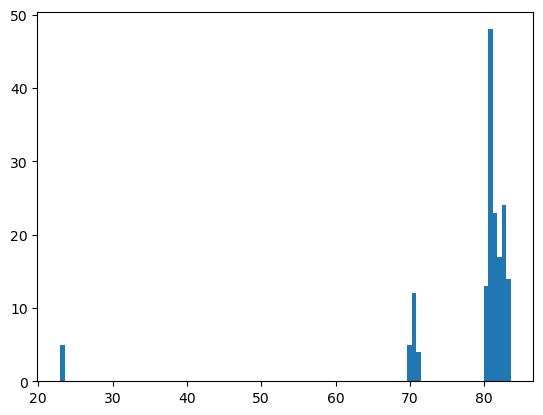

In [2]:
import matplotlib.pyplot as plt

plt.hist(color_list[1], bins=100)
plt.show()

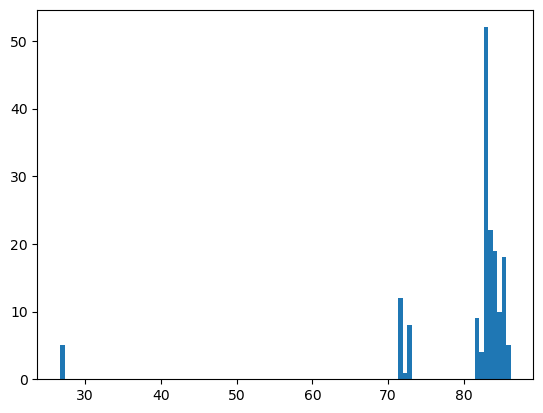

In [3]:
plt.hist(color_list[2], bins=100)
plt.show()

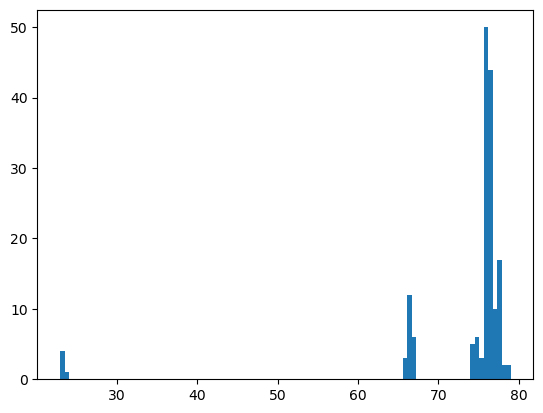

In [4]:
plt.hist(color_list[3], bins=100)
plt.show()

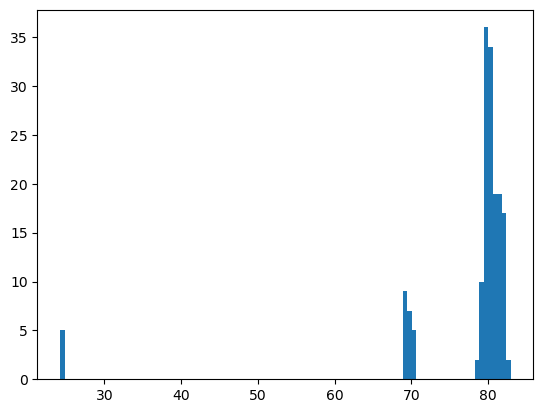

In [5]:
plt.hist(color_list[4], bins=100)
plt.show()